## Compute the Right Ascension and Elevation of the location of the Galactic Plane
### Glen Langston -- NSF --  2022 February 3
The galactic plane crossing points will be used to estimate horn radio telescope pointing offsets.     Over most of the Sky a transit telescope will detect the galactic plane crossing the sky twice.   The angular distances between these crossing points is correlated with the telescope elevation.  Once the telescope elevation is determined, the azimuth offsets can also be estimated.

In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord
# now set coordinates of galactic center, galactic anti-center and north galactic pole
c = SkyCoord([0., 180., 0.], [0., 0., 90.], frame='galactic', unit='deg')

In [2]:
# now transform to ra,dec in icrs frame
radec = c.transform_to(frame="icrs")


In [3]:
# next show the ra,dec coordinates of these 3 galactic locations
print(radec)

<SkyCoord (ICRS): (ra, dec) in deg
    [(266.40498829, -28.93617776), ( 86.40498829,  28.93617776),
     (192.85947789,  27.12825241)]>


In [4]:
# Now we'll step through the galactic plane coordinates in two arrays
import numpy as np
l = np.arange(360, dtype = float)
b = np.zeros(360)

In [5]:
# create coordinates with these galactic longitudes and zero latitude
plane = SkyCoord( l, b, frame='galactic', unit='deg')

In [6]:
# Now get the ra,dec for each of these galactic coordinates
gradec = plane.transform_to(frame="icrs")

In [17]:
#print(gradec)
ra_rad = gradec.ra.wrap_at(180.*u.deg).radian
ra_no_wrap_rad = gradec.ra.radian
dec_rad = gradec.dec.radian

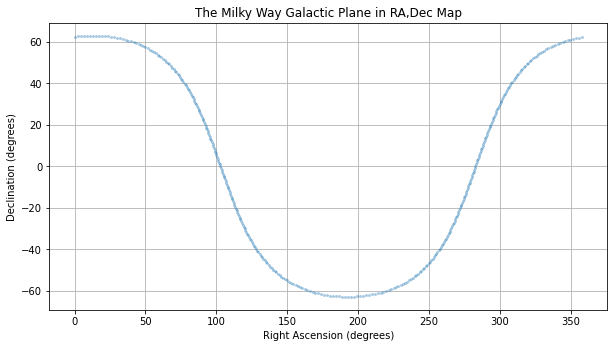

In [22]:
# next plot these coordinates 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4.2))
plt.subplot(111)
#plt.subplot(111, projection="Aitoff")
plt.title("Aitoff projection of the Milky Way Galactic Plane in RA,Dec Map")
plt.title("The Milky Way Galactic Plane in RA,Dec Map")
plt.grid(True)
#plt.plot(ra_rad, dec_rad, 'o', markersize=2, alpha=0.3)
plt.plot(np.degrees(ra_no_wrap_rad), np.degrees(dec_rad), 'o', markersize=2, alpha=0.3)
plt.subplots_adjust(top=0.95,bottom=0.0)
plt.xlabel("Right Ascension (degrees)")
plt.ylabel("Declination (degrees)")
plt.show()

In [19]:
decmax =  np.max(dec_rad)
imax = np.where( dec_rad == decmax)
decmin = np.min(dec_rad)
imin = np.where( dec_rad == decmin)

print("Galactic Plane Min Declination: %7.2f d" % (np.min(dec_rad)* 180./np.pi))
print("Galactic Plane RA of Min Declination: %7.2f d" % (ra_no_wrap_rad[imin]* 180./np.pi))
print("Galactic Plane Max Declination: %7.2f d" % (np.max(dec_rad)* 180./np.pi))
print("Galactic Plane RA of Max Declination: %7.2f d" % (ra_no_wrap_rad[imax]* 180./np.pi))
# Note that the galactic plane does not extend above 63 degrees declination or below -63

Galactic Plane Min Declination:  -62.87 d
Galactic Plane RA of Min Declination:  193.01 d
Galactic Plane Max Declination:   62.87 d
Galactic Plane RA of Max Declination:   13.01 d


In [10]:
# define N pairs of crossing points
N=62
crossinga = np.zeros(2*N)
crossingb = np.zeros(2*N)
decs = np.arange(2*N, dtype=float) - N

In [11]:
# for all declinations with two crossing points
for iii in range(2*62):
    dec = np.radians(iii - (N))
    for jjj in range(359):
        if dec_rad[jjj] >= dec and dec_rad[jjj+1] <= dec:
            crossinga[iii] = (ra_rad[jjj]+ra_rad[jjj+1])/2.
        if dec_rad[jjj] <= dec and dec_rad[jjj+1] >= dec:
            crossingb[iii] = (ra_rad[jjj]+ra_rad[jjj+1])/2.



In [12]:
# for some reason this calculation does not work at the galactic center
# fix by interpolation
for iii in range(2*62):
    if crossinga[iii] == 0.:
        crossinga[iii] = (crossinga[iii-1] + crossinga[iii+1])/2.
    if crossingb[iii] == 0.:
        crossingb[iii] = (crossingb[iii-1] + crossingb[iii+1])/2.



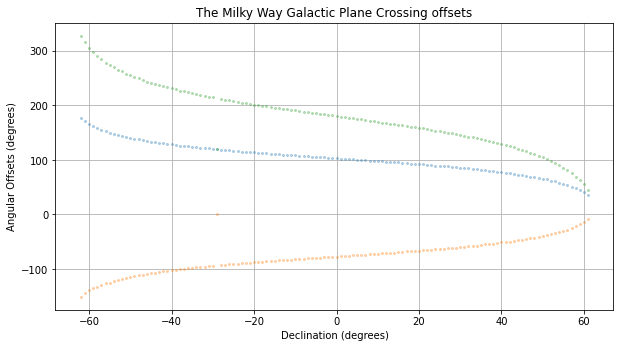

In [23]:
# next the coordinate offsets as a function of declination 
plt.figure(figsize=(10,4.2))
plt.subplot(111)
#plt.subplot(111, projection="Aitoff")
plt.title("The Milky Way Galactic Plane Crossing offsets")
plt.grid(True)
#plt.plot(ra_rad, dec_rad, 'o', markersize=2, alpha=0.3)
plt.plot(decs, np.degrees(crossinga), 'o', markersize=2, alpha=0.3)
plt.plot(decs, np.degrees(crossingb), 'o', markersize=2, alpha=0.3)
plt.plot(decs, np.degrees(crossinga-crossingb), 'o', markersize=2, alpha=0.3)
plt.xlabel("Declination (degrees)")
plt.ylabel("Angular Offsets (degrees)")
plt.subplots_adjust(top=0.95,bottom=0.0)
plt.show()


## Congratulations, You've computed the angular offsets between two galactic plane crossings
### Now we can use these offsets to determine the "Declination" of the observations

In [15]:
#convert to degrees for output
crossinga = np.degrees(crossinga)
crossingb = np.degrees(crossingb)

In [16]:
# now write an ascii file with these offsets
file = "GalacticPlaneCrossingOffsets.txt"
f = open(file, "w")
f.write("# Table of Angular offsets between Transit Crossings of the Galactic Plane\n")
f.write("# Glen Langston -- NSF -- glangsto@nsf.gov\n")
f.write("# Dec    RA1     RA2   Delta RA\n")
f.write("# (d)    (d)     (d)     (d)\n")
for iii in range(2*N):
    delta = crossinga[iii] - crossingb[iii]
    outstring = "%6.1f %7.2f %7.2f %7.2f\n" % (decs[iii], crossinga[iii], crossingb[iii], delta)
    f.write(outstring)
f.close()

### Great, you've written a file with a table of angular distances between galactic crossings.
Now use this table and a day of your observations to find the "true" declination of your observations.